In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon']
    
)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
Dataset =pd.read_csv('/content/tourist_accommodation_reviews.csv', encoding= 'unicode_escape')

In [3]:
Dataset_place = pd.read_csv('/content/place based.csv', encoding= 'unicode_escape')

In [2]:
Dataset_year = pd.read_csv('/content/hotel_by_year.csv', encoding= 'unicode_escape')

In [32]:
# as there were two different aspect for analysis that why two differrent dataset was applied place and year basis .
#so both are done in same code file and that is why one line is comentedin every code , 
#when need to run the other dataset then previousline will be commented.

In [3]:
#Dataset_place.head
Dataset_year.head

<bound method NDFrame.head of               ID               Review Date           Location  \
0    rn572905503  Reviewed April 12, 2018               Kathu   
1    rn572364712  Reviewed April 10, 2018               Kathu   
2    rn572308369   Reviewed April 9, 2018               Kathu   
3    rn572053040   Reviewed April 8, 2018               Kathu   
4    rn571915434   Reviewed April 8, 2018               Kathu   
..           ...                       ...                ...   
951  rn133364133    Reviewed July 3, 2012    Thalang District   
952  rn131065795    Reviewed June 1, 2012    Thalang District   
953  rn129609827     Reviewed May 8, 2012    Thalang District   
954  rn128526031  Reviewed April 24, 2012    Thalang District   
955  rn125726434   Reviewed March 6, 2012    Thalang District   

             Hotel/Restaurant name  \
0    Thong Dee The Kathu Brasserie   
1    Thong Dee The Kathu Brasserie   
2    Thong Dee The Kathu Brasserie   
3    Thong Dee The Kathu Brasserie   

In [4]:
#print(Dataset_place['Location'].unique())
print(Dataset_year['Location'].unique())

[' Kathu' ' Kata Beach' ' Karon Beach' ' Choeng Thale' ' Patong' ' Karon'
 ' Rawai' ' Thalang District' ' Phuket Town']


In [5]:
#Dataset_place['Location'].value_counts()
#Dataset['Location'].value_counts()
Dataset_year['Location'].value_counts()

 Kata Beach          256
 Choeng Thale        204
 Patong              133
 Rawai                84
 Karon Beach          80
 Thalang District     60
 Karon                59
 Kathu                51
 Phuket Town          29
Name: Location, dtype: int64

In [6]:
#Dataset_place['Hotel/Restaurant name'].value_counts()
Dataset_year['Hotel/Restaurant name'].value_counts()

Siam Supper Club                       86
EAT. bar & grill                       80
The Tavern                             59
Odysseus Greek Organic Restaurant      59
Thong Dee The Kathu Brasserie          51
Sam's Steaks and Grill                 48
Highway Curry Indian & Thai Cuisine    48
Kataturk Turkish Restaurant            46
Pad Thai Shop                          42
The Corner Restaurant                  42
Little Paris                           40
Istanbul Turkish Restaurant            40
Mali Seafood Restaurant & Bar          35
Nok and Jo's Restaurant                22
Sabai Beach Restaurant                 22
Modena                                 22
Rawai View Cafe' & Bar                 20
Saffron at Banyan Tree Phuket          20
Navrang Mahal                          17
The Ship Inn                           17
La Gaetana                             15
Delish Cafe                            15
The Red Tablecloth                     15
La Piazzetta di Capri Patong      

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
print(sentiment.polarity_scores('the hotel is not good'))


{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.3412}


In [9]:
Dataset_place['compound'] = [sentiment.polarity_scores(review)['compound'] for review in Dataset_place['Review']]
Dataset_place['neg'] = [sentiment.polarity_scores(review)['neg'] for review in Dataset_place['Review']]
Dataset_place['neu'] = [sentiment.polarity_scores(review)['neu'] for review in Dataset_place['Review']]
Dataset_place['pos'] = [sentiment.polarity_scores(review)['pos'] for review in Dataset_place['Review']]

In [8]:
Dataset_year['compound'] = [sentiment.polarity_scores(review)['compound'] for review in Dataset_year['Review']]
Dataset_year['neg'] = [sentiment.polarity_scores(review)['neg'] for review in Dataset_year['Review']]
Dataset_year['neu'] = [sentiment.polarity_scores(review)['neu'] for review in Dataset_year['Review']]
Dataset_year['pos'] = [sentiment.polarity_scores(review)['pos'] for review in Dataset_year['Review']]

In [10]:
#Dataset_place.head()
Dataset_year.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.000,0.823,0.177
1,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.000,0.557,0.443
2,rn572308369,"Reviewed April 9, 2018",Kathu,Thong Dee The Kathu Brasserie,We travel to Phuket every year from Australia ...,0.9633,0.000,0.650,0.350
3,rn572053040,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,Had roast beef and lamb plenty of it and very ...,-0.3691,0.116,0.840,0.044
4,rn571915434,"Reviewed April 8, 2018",Kathu,Thong Dee The Kathu Brasserie,This place has a lot to learn when it comes to...,0.8382,0.000,0.817,0.183


In [ ]:
Dataset_place[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,956.000000,956.000000,956.000000,956.000000
mean,0.711520,0.021363,0.730735,0.247899
std,0.359694,0.041876,0.127060,0.133223
min,-0.926600,0.000000,0.320000,0.000000
25%,0.657025,0.000000,0.643750,0.149000
50%,0.859100,0.000000,0.734000,0.246500
75%,0.929925,0.035000,0.819000,0.338000
max,0.989800,0.322000,1.000000,0.680000


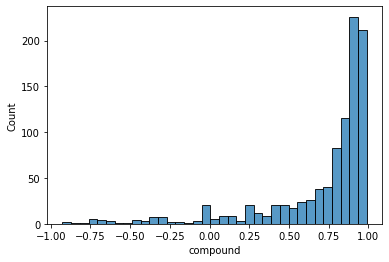

In [11]:
#sns.histplot(Dataset_place['compound'])
sns.histplot(Dataset_year['compound'])

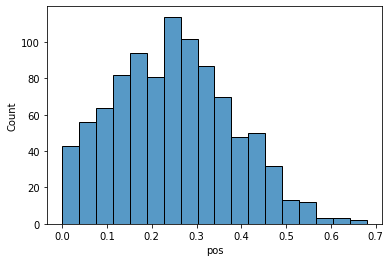

In [12]:
#sns.histplot(Dataset_place['pos'])
sns.histplot(Dataset_year['pos'])

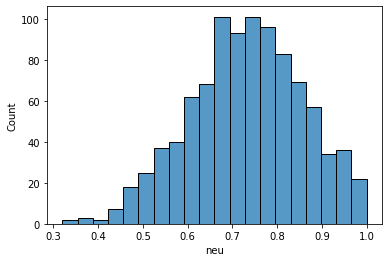

In [13]:
#sns.histplot(Dataset_place['neu'])
sns.histplot(Dataset_year['neu'])

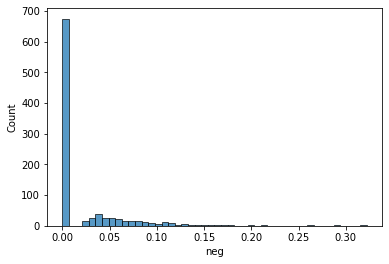

In [15]:
#sns.histplot(Dataset_place['neg'])
sns.histplot(Dataset_year['neg'])

In [15]:
neg_review = pd.DataFrame((Dataset_place['compound']<=0).groupby(Dataset_place['Hotel/Restaurant name']).sum()
/Dataset_place['Hotel/Restaurant name'].groupby(Dataset_place['Hotel/Restaurant name']).count()*100,
                      columns = ['% neg review']).sort_values(by = '% neg review')

In [16]:
neg_review = pd.DataFrame((Dataset_year['compound']<=0).groupby(Dataset_year['Hotel/Restaurant name']).sum()
/Dataset_year['Hotel/Restaurant name'].groupby(Dataset_year['Hotel/Restaurant name']).count()*100,
                      columns = ['% neg review']).sort_values(by = '% neg review')

In [17]:
neg_review

,% neg review
Hotel/Restaurant name,
9' Sea Breeze,0.000000
Naiyang Park Restaurant,0.000000
Highway Curry Indian & Thai Cuisine,0.000000
Sam's Steaks and Grill,0.000000
The Tavern,1.694915
Odysseus Greek Organic Restaurant,1.694915
Thong Dee The Kathu Brasserie,1.960784
Kataturk Turkish Restaurant,2.173913
The Corner Restaurant,2.380952


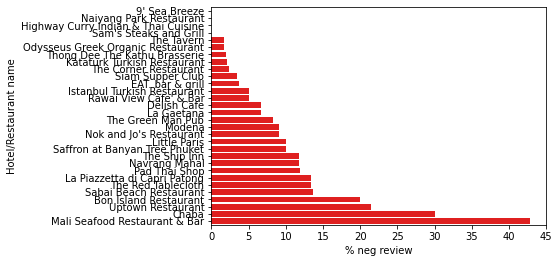

In [18]:
sns.barplot(data = neg_review, x = '% neg review', y = neg_review.index, color = 'red' )